In [3]:
import numpy as np
import tensorflow as tf

import os
# np.random.seed(1337)  # for reproducibility
# tf.random.set_seed(1337)
# os.environ['TF_DETERMINISTIC_OPS'] = '1'
# os.environ['TF_CUDNN_DETERMINISTIC '] = '1'


os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [1]:
from data.utils import load_data
from data.scaling import normalize

filtro_tipos_eventos_permitidos = ['listing']
query_str = 'title.isna()'
for filtro in filtro_tipos_eventos_permitidos:
    query_str += f' or title.str.lower().str.contains("{filtro}")'
    # df = df.query(f'event_title.isna() or event_title.str.lower().str.contains("{filtro}")')
print(query_str)

coin = 'IOTA'
df = load_data(coin, 'IOTA', event_days_left_lookback=7, storage_folder='../data', events_query=query_str)
df.head()

title.isna() or title.str.lower().str.contains("listing")
found topic encode for IOTA: /g/11d_88l3hz - type: Topic
Fetching '/g/11d_88l3hz' for period:2020-09-04 2021-05-31
Fetching '/g/11d_88l3hz' for period:2020-03-19 2020-12-13
Normalize by overlapping period:2020-09-04 2020-12-13
Fetching '/g/11d_88l3hz' for period:2019-10-02 2020-06-27
Normalize by overlapping period:2020-03-19 2020-06-27
Fetching '/g/11d_88l3hz' for period:2019-04-16 2020-01-10
Normalize by overlapping period:2019-10-02 2020-01-10
Fetching '/g/11d_88l3hz' for period:2018-10-29 2019-07-25
Normalize by overlapping period:2019-04-16 2019-07-25
Fetching '/g/11d_88l3hz' for period:2018-05-13 2019-02-06
Normalize by overlapping period:2018-10-29 2019-02-06
Fetching '/g/11d_88l3hz' for period:2017-11-25 2018-08-21
Normalize by overlapping period:2018-05-13 2018-08-21
Fetching '/g/11d_88l3hz' for period:2017-06-09 2018-03-05
Normalize by overlapping period:2017-11-25 2018-03-05
Fetching '/g/11d_88l3hz' for period:2016-12

,High,Low,Open,Close,Volume,Marketcap,price,price (%),trend,days_to_event_happen,...,event_in_3_days_votes,event_in_3_days_confidence,event_in_4_days_votes,event_in_4_days_confidence,event_in_5_days_votes,event_in_5_days_confidence,event_in_6_days_votes,event_in_6_days_confidence,event_in_7_days_votes,event_in_7_days_confidence
date,,,,,,,,,,,,,,,,,,,,,
2017-06-14,0.606196,0.495745,0.592347,0.528916,14194900.0,1.470138e+09,0.560632,0.000000,22.079922,<NA>,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2017-06-15,0.543165,0.300365,0.528284,0.363661,10300400.0,1.010807e+09,0.445973,-0.204518,20.653220,<NA>,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2017-06-16,0.448249,0.309852,0.353285,0.410757,6920690.0,1.141712e+09,0.382021,-0.143398,15.116255,<NA>,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2017-06-17,0.444205,0.414139,0.426762,0.419906,3100660.0,1.167141e+09,0.423334,0.108143,12.262849,<NA>,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2017-06-18,0.426069,0.393790,0.420597,0.405862,2514450.0,1.128106e+09,0.413229,-0.023869,12.025065,<NA>,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


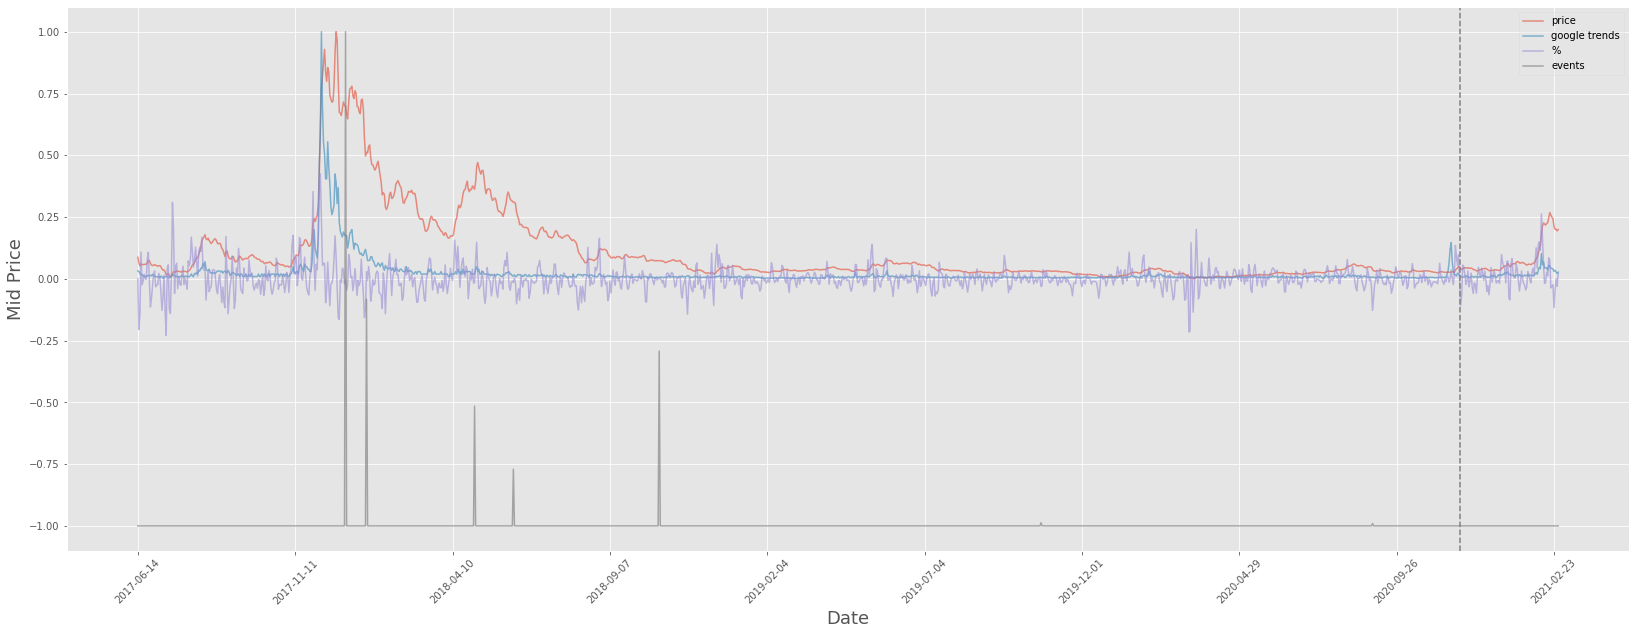

<module 'matplotlib.pyplot' from 'C:\\Users\\jgmu6\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [8]:
from data.visualization import plot_data
import pandas as pd
prices, _ = normalize(df.loc[:, 'price'].to_numpy(), range=(0,1))
variation = df.loc[:, 'price'].pct_change().fillna(0).to_numpy()
# tweet, _ = normalize(df.loc[:, 'tweet_volume'].to_numpy(), range=(0,1))
google_trends, _ = normalize(df.loc[:, 'trend'].to_numpy(), range=(0,1))
events, _ = normalize((df.loc[:, 'event_votes'].fillna(0)).to_numpy(), range=(-1,1))
plot_data([prices, google_trends, variation, events], 
          legends=['price', 'google trends', '%', 'events'], tick=150,
          verticalLineAt=len(prices)*0.93, labels=df.index.date[::150], blocking=False)

In [40]:
df.iloc[218:, 9:]

,days_to_event_happen,event_title,event_votes,event_confidence,event_in_1_days_votes,event_in_1_days_confidence,event_in_2_days_votes,event_in_2_days_confidence,event_in_3_days_votes,event_in_3_days_confidence,event_in_4_days_votes,event_in_4_days_confidence,event_in_5_days_votes,event_in_5_days_confidence,event_in_6_days_votes,event_in_6_days_confidence,event_in_7_days_votes,event_in_7_days_confidence
date,,,,,,,,,,,,,,,,,,
2018-01-18,2,XTangle Listing,284,0.897887,0.0,NaN,284.0,0.897887,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2018-01-19,<NA>,NaN,<NA>,NaN,284.0,0.897887,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2018-01-20,<NA>,NaN,<NA>,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2018-01-21,<NA>,NaN,<NA>,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2018-01-22,<NA>,NaN,<NA>,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23,<NA>,NaN,<NA>,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2021-02-24,<NA>,NaN,<NA>,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2021-02-25,<NA>,NaN,<NA>,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [10]:
prices, _ = normalize(df.loc[:, 'price'].to_numpy())
variation = df.loc[:, 'price (%)'].to_numpy()
# variation = df.loc[:, 'price'].pct_change().fillna(0).to_numpy()
volume, _ = normalize(df['Volume'].to_numpy())
volume_variation = df['Volume'].pct_change().fillna(0).to_numpy()
# tweet, _ = normalize(df.loc[:, 'tweet_volume'].to_numpy())
# tweet_variation = df.loc[:, 'tweet_volume'].pct_change().fillna(0).to_numpy()
google_trends, _ = normalize(df.loc[:, 'trend'].to_numpy())
google_trends_variation = df.loc[:, 'trend'].pct_change().fillna(0).to_numpy()

prices[:3], variation[:3], google_trends[:3]

(array([-0.82595809, -0.87079275, -0.89579945]),
 array([ 0.        , -0.2045176 , -0.14339784]),
 array([-0.93628805, -0.94049085, -0.9568017 ]))

In [12]:
# event_day_count, _ = normalize(df.loc[:, 'days_to_event_happen'].fillna(0).to_numpy())
event_votes, votes_scaler = normalize(df.loc[:, 'event_votes'].fillna(0).to_numpy(), range=(0,1))
event_confidence, conf_scaler = normalize(df.loc[:, 'event_confidence'].to_numpy(), range=(-1,1))   # mantém os nan fora da normalização, e então converte para 0.0
event_confidence = np.nan_to_num(event_confidence)
event_votes_features = [event_votes]
event_confidence_features = [event_confidence]
for i in range(5):
    votes, confidence = df[f'event_in_{i+1}_days_votes'].to_numpy(), df[f'event_in_{i+1}_days_confidence'].to_numpy()
    votes =  votes_scaler.transform(votes.reshape(-1,1)).reshape(-1)
    confidence =  conf_scaler.transform(confidence.reshape(-1,1)).reshape(-1)
    confidence = np.nan_to_num(confidence)

    event_votes_features.append(votes)
    event_confidence_features.append(confidence)

In [13]:
from typing import Tuple
# look_behind: passos (dias) anteriores usados para prever o proximo.
N = 30
foward_days = 1  # quantos dias prever
used_features_names = ['price', 'variation', 'volume']
features = [prices, variation, volume, volume_variation] #+ event_votes_features + event_confidence_features
target = prices

def to_keras_format(features: list, target) -> Tuple[np.array, np.array]:
    n_samples = len(target) - N - (foward_days-1)
    # matriz de dimensao: [n_samples, N, n_features];
    features_set = np.empty((n_samples, N, len(features)))  # type: np.ndarray
    labels = [None]*n_samples
    for i in range(n_samples):
        for j in range(N):
            for ft_idx in range(len(features)):
                feature = features[ft_idx]
                features_set[i, j, ft_idx] = feature[i+j]

        labels[i] = target[N+i-1: N+i+foward_days]
    labels = np.array(labels)

    return features_set, labels

features_set, labels = to_keras_format(features, target)


In [14]:
from data.utils import split_data
print('dividindo os dados em treino e teste')
# shuffle_mask = np.arange(len(features_set))
# np.random.shuffle(shuffle_mask)
# features_set_shuffled, labels_shuffled = features_set[shuffle_mask], labels[shuffle_mask]

train_X, test_X = split_data(features_set, ratio=0.90)
train_y, test_y = split_data(labels, ratio=0.90)

dividindo os dados em treino e teste


In [15]:
from keras.models import Model
from keras.layers import Input, LSTM, Dropout, Dense

def build_model(train_X, train_y) -> Model:
    inputs = Input(shape=train_X.shape[1:])
    # lstm = LSTM(units=250, return_sequences=True, input_shape=train_X.shape[1:])(inputs)
    # lstm = Dropout(0.15)(lstm)

    lstm = LSTM(units=750, return_sequences=False, input_shape=train_X.shape[1:])(inputs)
    lstm = Dropout(0.1)(lstm)
    x = lstm
    # time_embedding = TimeDistributed(Time2Vec(kernel_size=1))(lstm)
    # x = concatenate([lstm, time_embedding], -1)

    # x = tf_MultiHeadAttention(num_heads=4, head_size=96,output_size=250,  dropout=0.15)((x,x))
    # x = LayerNormalization(epsilon=1e-6)(Add()([lstm,x]))
    # x = Conv1D(filters=128, kernel_size=1, activation='relu')(x)
    # x = LayerNormalization(epsilon=1e-6)(Add()([lstm,x]))

    # avg_pool = GlobalAveragePooling1D()(x)
    # x = GlobalMaxPooling1D()(lstm)
    # x = concatenate([avg_pool, max_pool])

    x = Dense(units=175, activation='linear')(x)
    x = Dropout(0.1)(x)
    x = Dense(units=75, activation='linear')(x)
    x = Dropout(0.1)(x)
    x = Dense(units=foward_days)(x)
    return Model(inputs=inputs, outputs=x)

In [16]:
from matplotlib import pyplot as plt
# vizualizando estatisticas do modelo em si e seu treino
def plot_train_history(modelo: Model, plot_above_or_below_zero_accuracy: bool, figsize=(25,10)):
    plt.rcParams['figure.figsize'] = figsize
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    # plt.figure(figsize=(20, 8))
    ax1.plot(modelo.history.history['loss'])
    ax1.plot(modelo.history.history['val_loss'])
    ax1.title.set_text('model loss')
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax1.legend(['train', 'test'], loc='upper left')
    # ax1.show(block=True)

    ax2.plot(modelo.history.history['mean_squared_error'])
    ax2.plot(modelo.history.history['val_mean_squared_error'])
    ax2.title.set_text('model meanSquaredError')
    ax2.set_ylabel('mse')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'test'], loc='upper left')
    # ax2.show(block=True)

    ax3.plot(modelo.history.history['movement_accuracy'])
    ax3.plot(modelo.history.history['val_movement_accuracy'])
    ax3.title.set_text('model movement direction accuracy')
    ax3.set_ylabel('accuracy')
    ax3.set_xlabel('epoch')
    ax3.legend(['train', 'test'], loc='upper left')
    # ax3.show(block=True)

    # plote esse apenas se seu dado target for de variação (não faz sentido para dado bruto)
    if plot_above_or_below_zero_accuracy:
        ax4.plot(modelo.history.history['above_or_below_zero_accuracy'])
        ax4.plot(modelo.history.history['val_above_or_below_zero_accuracy'])
        ax4.title.set_text('price up or down accuracy *')
        ax4.set_ylabel('accuracy')
        ax4.set_xlabel('epoch')
        ax4.legend(['train', 'test'], loc='upper left')
        # ax4.show(block=True)
    plt.tight_layout()
    plt.show()

In [10]:
from keras.losses import mean_squared_error as keras_mean_squared_error, cosine_similarity as keras_cosine_similarity
from metrics.custom import custom_loss2, custom_loss, custom_movement_accuracy, above_or_below_zero_accuracy, movement_accuracy
from metrics.custom import mean_squared_error, cosine_similarity as custom_cosine_similarity

tf.keras.backend.clear_session() #limpa modelos e dados anteriores, para evitar vazamento de memoria

features = [variation, volume_variation] #+ event_features
target = variation

features_set, labels = to_keras_format(features, target)
train_X, test_X = split_data(features_set, ratio=0.85)
train_y, test_y = split_data(labels, ratio=0.85)


modelo = build_model(train_X, train_y)

opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)
modelo.compile(optimizer=opt, loss=mean_squared_error, metrics=[mean_squared_error, movement_accuracy, above_or_below_zero_accuracy])# 'cosine_similarity', 'mean_squared_error'
modelo.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=400, batch_size=128)  # validation_data=(test_X, test_y)

ro_accuracy: 0.7102
Epoch 99/160
60/60 [==============================] - 8s 141ms/step - loss: 9.2711e-04 - mean_squared_error: 9.2711e-04 - movement_accuracy: 0.7225 - above_or_below_zero_accuracy: 0.7463 - val_loss: 7.6694e-04 - val_mean_squared_error: 8.1515e-04 - val_movement_accuracy: 0.7670 - val_above_or_below_zero_accuracy: 0.7500
Epoch 100/160
60/60 [==============================] - 8s 141ms/step - loss: 8.5797e-04 - mean_squared_error: 8.5818e-04 - movement_accuracy: 0.6921 - above_or_below_zero_accuracy: 0.7650 - val_loss: 8.2443e-04 - val_mean_squared_error: 8.7262e-04 - val_movement_accuracy: 0.7216 - val_above_or_below_zero_accuracy: 0.6818
Epoch 101/160
60/60 [==============================] - 8s 141ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - movement_accuracy: 0.7045 - above_or_below_zero_accuracy: 0.7522 - val_loss: 7.7716e-04 - val_mean_squared_error: 8.2653e-04 - val_movement_accuracy: 0.7557 - val_above_or_below_zero_accuracy: 0.7443
Epoch 102/160
60/60 

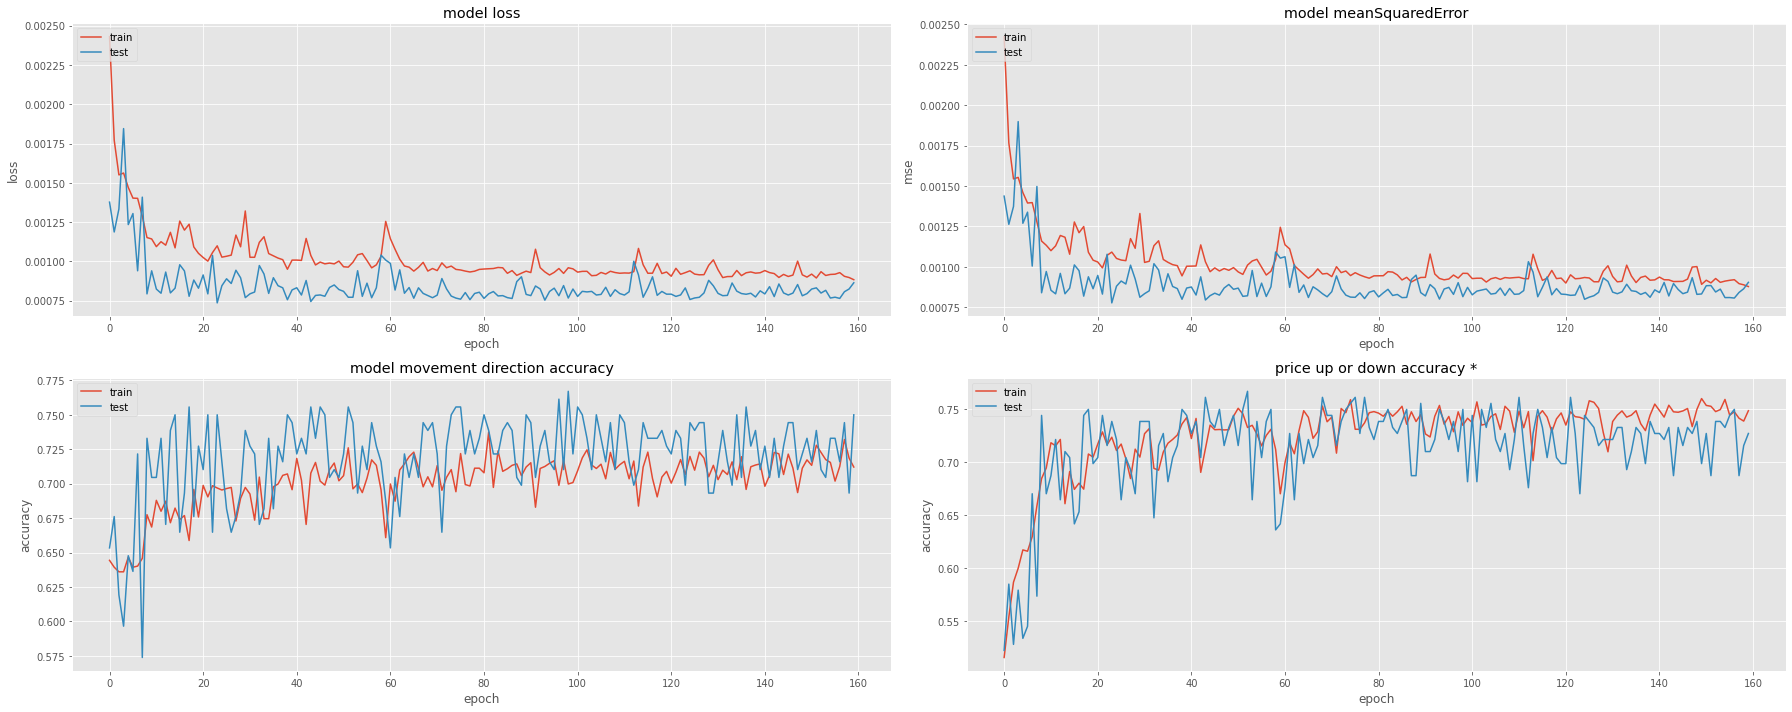

11/11 [==============================] - 0s 25ms/step - loss: 8.6401e-04 - mean_squared_error: 9.0370e-04 - movement_accuracy: 0.7500 - above_or_below_zero_accuracy: 0.7273
Train Score: [0.0008760109776630998, 0.0008774613379500806, 0.7081249952316284, 0.7362499833106995]
Test Score: [0.0008640143787488341, 0.0009036969277076423, 0.75, 0.7272727489471436]
Cosine similarity -0.9680318
Mean Square Error 0.0008640145
Movement accuracy 0.7380952


In [11]:
plot_train_history(modelo, plot_above_or_below_zero_accuracy=True)

train_score = modelo.evaluate(x=train_X, y=train_y, batch_size=16)
test_score = modelo.evaluate(x=test_X, y=test_y, batch_size=16)
print('Train Score:', train_score)
print('Test Score:', test_score)
#predictions = scaler.inverse_transform(predictions)

#timestep_size = 1./len(features_set)
testPredict = modelo.predict(test_X)

timestep_size = 0.1
original_vectors = [[timestep_size, test_y[i, -1] - test_y[i-1, -1]] for i in range(1, len(test_y))]
prediction_vectors = [[timestep_size, testPredict[i, -1] - test_y[i-1, -1]] for i in range(1, len(test_y))]
cos_similarity = np.mean(keras_cosine_similarity(original_vectors, prediction_vectors))
print('Cosine similarity %s' % cos_similarity)
mse = mean_squared_error(test_y, testPredict).numpy()
print('Mean Square Error %s' % mse)
upDownScore = movement_accuracy(test_y, testPredict).numpy()
print('Movement accuracy %s' % upDownScore)

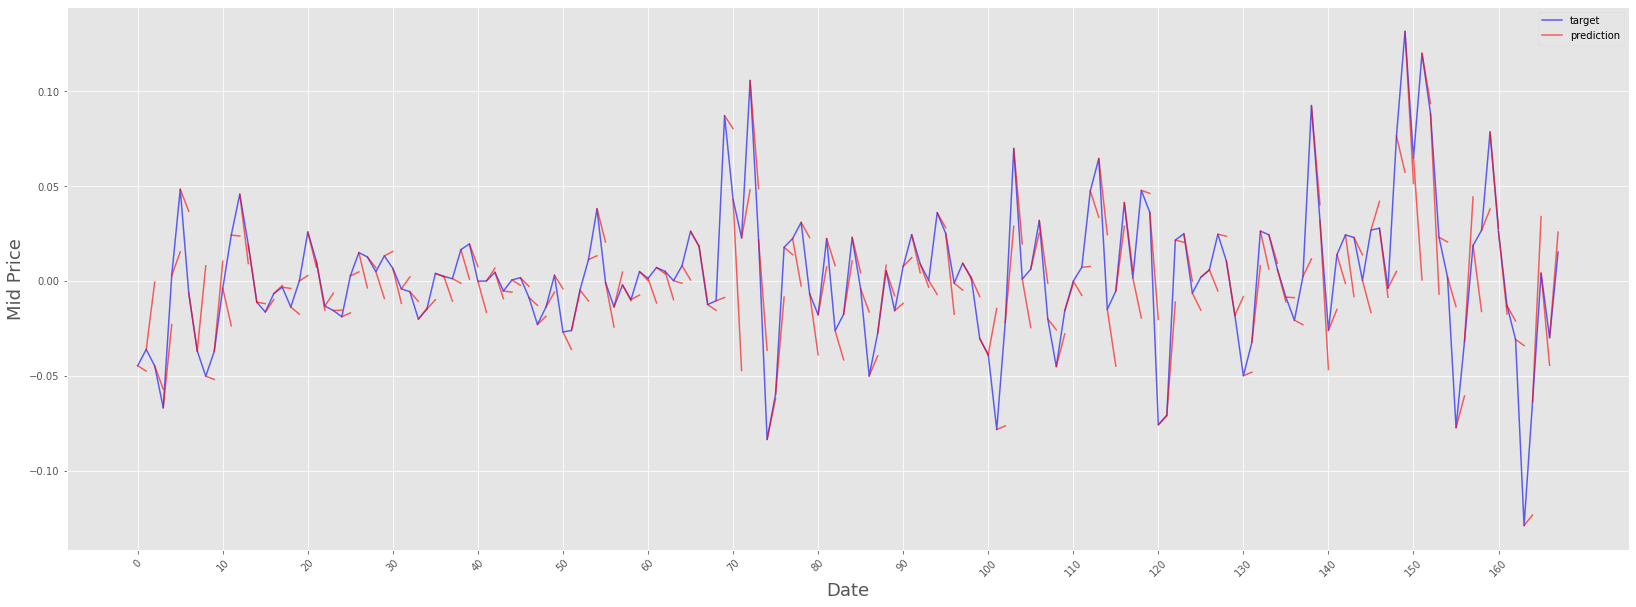

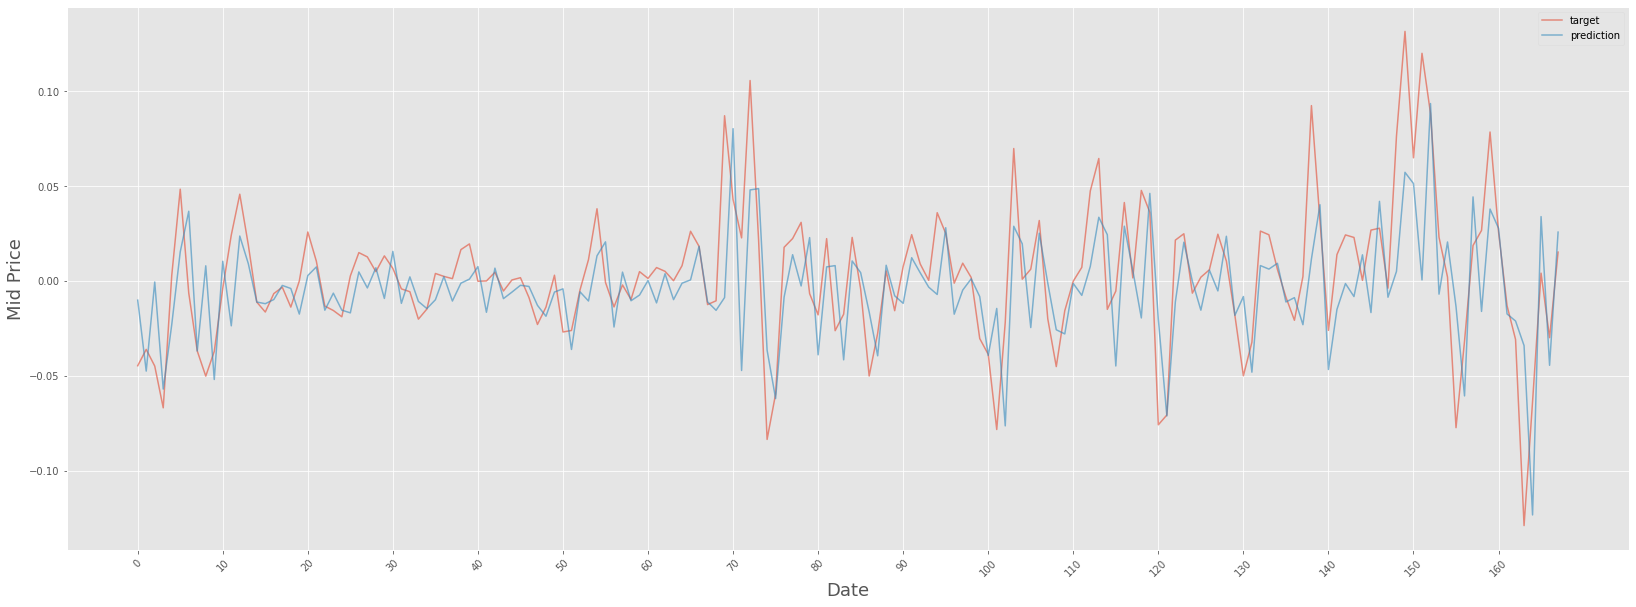

In [12]:
predictions = testPredict
targets_test = test_y[:, -1:].tolist()
# prediction tem um shape (samples, foward_days), entao vamos pegar previsoes de foward_days dias, a cada partir de pontos com intervalo de foward_days
foward_days_predictions = []
for i in range(1, predictions.shape[0], foward_days):
    foward_days_predictions.append(np.array([None]*(i-1) + targets_test[i-1] +
                                            predictions[i].tolist() +
                                            [None]*(predictions.shape[0]-(i+foward_days))))


fig = plot_data([targets_test] + foward_days_predictions, tick=10, legends=['target', 'prediction'],
                colors=['b', 'r'] + ['r']*len(foward_days_predictions), blocking=False)
# 1 day predictions
fig = plot_data([targets_test, predictions[:, 0]], tick=10, legends=['target', 'prediction'], blocking=False)

In [42]:
# tf.keras.backend.clear_session() #limpa modelos e dados anteriores, para evitar vazamento de memoria
from metrics.custom import above_or_below_zero_accuracy, movement_accuracy
from metrics.custom import mean_squared_error, cosine_similarity as custom_cosine_similarity

from sklearn.model_selection import KFold, RepeatedKFold
from shutil import rmtree

def get_model_name(k, n_repeat = None):
    if n_repeat:
        return 'model_'+str(k)+'_'+str(n_repeat)+'.h5'
    return 'model_'+str(k)+'.h5'

def build_and_run_and_show(features, target, shuffle_mask, loss_function, epochs=800, batch_size=128) -> Model:
    save_dir = './tmp_iota/saved_models/'
    if os.path.exists(save_dir):
        rmtree(save_dir)

    features_set, labels = to_keras_format(features, target)

    # shuffle_mask = np.arange(len(features_set))
    # np.random.shuffle(shuffle_mask)
    unshuffle_mask = np.zeros(len(shuffle_mask), dtype=int)
    for i in range(len(shuffle_mask)):
        unshuffle_mask[shuffle_mask[i]] = i

    features_set, labels = features_set[shuffle_mask], labels[shuffle_mask]

    
    TEST_MSE = []
    TEST_MOV_ACCURACY = []
    TEST_UPDOWN_ACCURACY = []
    # kf = KFold(n_splits = 5)
    n_repeats = 2
    kf = RepeatedKFold(n_splits = 5, n_repeats = n_repeats, random_state=1337) # random_state fixo para manter reproducibilidade entre chamadas dessa função

    fold_num = 1
    repeat_num = 1
    for train_index, test_index  in kf.split(features_set, labels):
        train_X, test_X = features_set[train_index], features_set[test_index]
        train_y, test_y = labels[train_index], labels[test_index]

        model = build_model(train_X, train_y)
        opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)
        model.compile(optimizer=opt, loss=loss_function, metrics=[mean_squared_error, movement_accuracy, above_or_below_zero_accuracy])# 'cosine_similarity', 'mean_squared_error'

        # CREATE CALLBACKS
        best_mse_checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+'mse/'+get_model_name(fold_num, repeat_num),#+'_{epoch:03d}-{val_mean_squared_error:.5f}', 
                                monitor='val_mean_squared_error', verbose=0, save_best_only=True, mode='min')
        best_movAcc_checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+'mov_accuracy/'+get_model_name(fold_num, repeat_num),#+'_{epoch:03d}-{val_movement_accuracy:.5f}', 
                                monitor='val_movement_accuracy', verbose=0, save_best_only=True, mode='max')
        best_above_below_zero_checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+'above_or_below_zero_accuracy/'+get_model_name(fold_num, repeat_num),#+'_{epoch:03d}-{val_movement_accuracy:.5f}', 
                                monitor='val_above_or_below_zero_accuracy', verbose=0, save_best_only=True, mode='max')
        checkpoints = [best_mse_checkpoint, best_movAcc_checkpoint, best_above_below_zero_checkpoint]

        print(f'treinando fold {fold_num}, repetição {repeat_num} (400 epochs dá 2min +-)')
        model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=epochs, batch_size=batch_size, callbacks=checkpoints, verbose=0)

        # PLOT HISTORY
        plot_train_history(model, plot_above_or_below_zero_accuracy=True, figsize=(25,8))

        # LOAD BEST MODEL (for specific metric) to evaluate the performance of the model
        model.load_weights(save_dir+"mse/"+get_model_name(fold_num, repeat_num))
        results = model.evaluate(x=test_X, y=test_y, batch_size=1)
        results = dict(zip(model.metrics_names, results))
        TEST_MSE.append(results['mean_squared_error'])
        
        model.load_weights(save_dir+"mov_accuracy/"+get_model_name(fold_num, repeat_num))
        results = model.evaluate(x=test_X, y=test_y, batch_size=1)
        results = dict(zip(model.metrics_names, results))
        TEST_MOV_ACCURACY.append(results['movement_accuracy'])

        model.load_weights(save_dir+"above_or_below_zero_accuracy/"+get_model_name(fold_num, repeat_num))
        results = model.evaluate(x=test_X, y=test_y, batch_size=1)
        results = dict(zip(model.metrics_names, results))
        TEST_UPDOWN_ACCURACY.append(results['above_or_below_zero_accuracy'])

        if repeat_num % n_repeats == 0:
            fold_num +=1
            repeat_num = 1
        else:    
            repeat_num += 1        


        tf.keras.backend.clear_session()

    print('\nResults:\n')
    print(f'MeanSquaredError: {TEST_MSE}')
    print(f'MovementDiretionAccuracy: {TEST_MOV_ACCURACY}')
    print(f'AboveOrBellowAccuracy: {TEST_UPDOWN_ACCURACY}')
    print(f'MeanSquaredError mean: {np.mean(TEST_MSE)}')
    print(f'MovementDiretionAccuracy mean: {np.mean(TEST_MOV_ACCURACY)}')
    print(f'AboveOrBellowAccuracy mean: {np.mean(TEST_UPDOWN_ACCURACY)}')

    return

In [43]:
shuffle_mask = np.arange(len(features_set))
np.random.shuffle(shuffle_mask)

In [44]:
tf.keras.backend.clear_session()
features = [variation, volume_variation] #+ event_features
target = variation
model_mse = build_and_run_and_show(features, target, shuffle_mask, mean_squared_error)

treinando fold 1, repetição 1 (400 epochs dá 2min +-)


UnknownError:    Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[model/lstm/PartitionedCall]] [Op:__inference_train_function_3405]

Function call stack:
train_function -> train_function -> train_function


In [ ]:
features = [variation, volume_variation] + event_votes_features + event_confidence_features
target = variation
model_events = build_and_run_and_show(features, target, shuffle_mask, mean_squared_error)

In [ ]:
features = [variation, volume_variation] + event_votes_features
target = variation
model_events = build_and_run_and_show(features, target, shuffle_mask, mean_squared_error)

desvio padrao
correlação